Before we talk about agglomerative clustering, we need to understand hierarchical clustering.
**Hierarchical clustering** refers to a set of clustering algorithms that build tree-like clusters by
successively splitting and merging them. This hierarchical structure is represented using a tree.

Hierarchical clustering algorithms cna be either bottom-up or top-down. Now what does this 
mean? In bottom-up algorithms, each datapoint is treated as a separate cluster with a single
object. These clusters are then successively merged until all the clusters are merged into a
single giant cluster. This is called **agglomerative clustering**. On the other hand, top-down
algorithms start with a gian cluster and successively split these clusters until individual
datapoints are reached. You can lean more about it at
http://nlp.stanford.edi/IR-book/html/htmledition/hierarchical-agglomeritive-clustering-1.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [2]:
# Define a function to perform agglomeritive clustering
def perform_clustering(X, connectivity, title, num_clusters=3, linkage='ward'):
    plt.figure()
    model = AgglomerativeClustering(linkage=linkage, 
                    connectivity=connectivity, n_clusters=num_clusters)
    model.fit(X)

    # extract labels
    labels = model.labels_

    # specify marker shapes for different clusters
    markers = '.vx'

    # iterate through the datapoints and plot them accordingly using different markers
    for i, marker in zip(range(num_clusters), markers):
        # plot the points belong to the current cluster
        plt.scatter(X[labels==i, 0], X[labels==i, 1], s=50, 
                    marker=marker, color='k', facecolors='none')

    plt.title(title)

In order to demonstrate the advantage of agglomerative clustering, we need to
run it on datapoints that are linked spatially but also located close to each
other in space. We want the linked datapoints to belong to the same cluster as
opposed to datapoints that are just spatially close to each other. Let's define
a function to get a set of datapoints on a spiral:

In [3]:
def get_spiral(t, noise_amplitude=0.5):
    r = t
    x = r * np.cos(t)
    y = r * np.sin(t)

    return add_noise(x, y, noise_amplitude)

In [4]:
# Add some noise to the curve to add some uncertainty
def add_noise(x, y, amplitude):
    X = np.concatenate((x, y))
    X += amplitude * np.random.randn(2, X.shape[1])
    return X.T

In [5]:
# Define a function to get datapoints located on a rose curve
def get_rose(t, noise_amplitude=0.02):
    # Equation for "rose" (or rhodonea curve); if k is odd, then
    # the curve will have k petals, else it will have 2k petals
    k = 5       
    r = np.cos(k*t) + 0.25 
    x = r * np.cos(t)
    y = r * np.sin(t)

    return add_noise(x, y, noise_amplitude)

In [6]:
# Define a function to get datapoints located on a hypotrochoid
def get_hypotrochoid(t, noise_amplitude=0):
    a, b, h = 10.0, 2.0, 4.0
    x = (a - b) * np.cos(t) + h * np.cos((a - b) / b * t) 
    y = (a - b) * np.sin(t) - h * np.sin((a - b) / b * t) 

    return add_noise(x, y, 0)

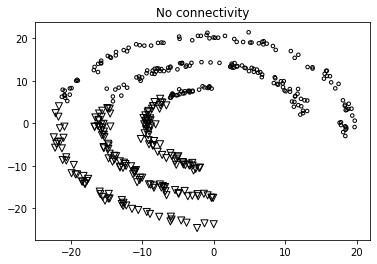

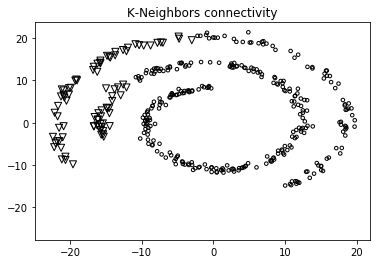

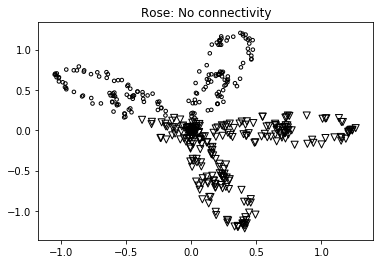

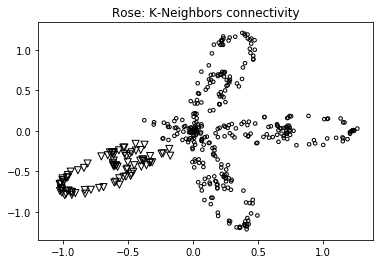

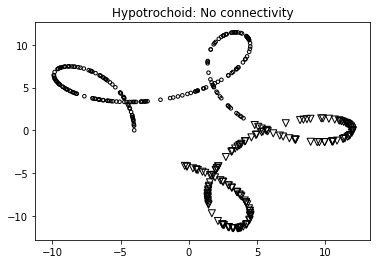

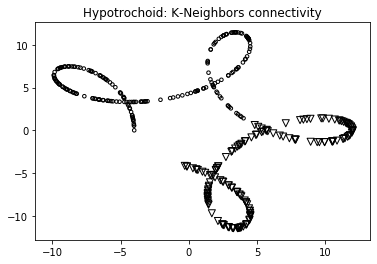

In [7]:
if __name__=='__main__':
    # Generate sample data
    n_samples = 500 
    np.random.seed(2)
    t = 2.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    X = get_spiral(t)

    # No connectivity
    connectivity = None 
    perform_clustering(X, connectivity, 'No connectivity')

    # Create K-Neighbors graph 
    connectivity = kneighbors_graph(X, 10, include_self=False)
    perform_clustering(X, connectivity, 'K-Neighbors connectivity')

    X_rose = get_rose(t)
    # No connectivity
    connectivity = None 
    perform_clustering(X_rose, connectivity, 'Rose: No connectivity')

    # Create K-Neighbors graph 
    connectivity = kneighbors_graph(X_rose, 10, include_self=False)
    perform_clustering(X_rose, connectivity, 'Rose: K-Neighbors connectivity')

    X_troch = get_hypotrochoid(t)
    # No connectivity
    connectivity = None 
    perform_clustering(X_troch, connectivity, 'Hypotrochoid: No connectivity')

    # Create K-Neighbors graph 
    connectivity = kneighbors_graph(X_troch, 10, include_self=False)
    perform_clustering(X_troch, connectivity, 'Hypotrochoid: K-Neighbors connectivity')



    plt.show()